In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

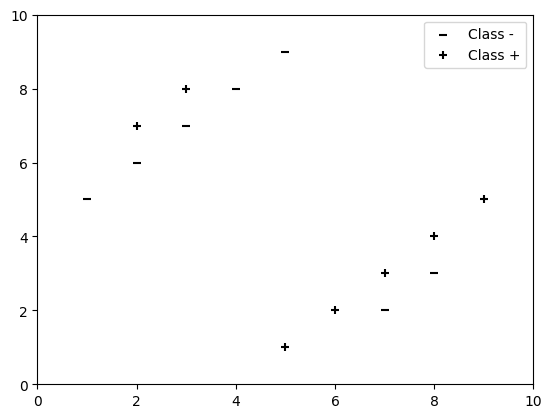

In [ ]:
# Define data points and labels based on the visual pattern in the image
X = np.array([
    [1, 5], [2, 6], [3, 7], [4, 8], [5, 9], [7, 2], [8, 3], [5, 1], [6, 2],
    [2, 7], [3, 8], [7, 3], [8, 4], [9, 5]
])

# Define labels: 0 for '-' class, 1 for '+' class
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

# Plot the data to verify it matches the original
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='_', color='black', label='Class -')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', color='black', label='Class +')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.legend()
plt.show()


In [ ]:
import numpy as np

# LOOCV to find the optimal value of k
loo = LeaveOneOut()
best_k = 1
best_error = 1  # Start with the worst possible error (100%)

# Test k values from 1 to 5 (can be extended based on your choice)
for k in range(6, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    errors = []

    # Loop over each split in LOOCV
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error = 1 - accuracy_score(y_test, y_pred)
        errors.append(error)

    # Calculate average error for this k
    avg_error = np.mean(errors)

    # Update best k if necessary
    if avg_error < best_error:
        best_error = avg_error
        best_k = k

print(f"The optimal k is {best_k} with an error rate of {best_error:.2f}")


The optimal k is 7 with an error rate of 0.29
